<a href="https://colab.research.google.com/github/BuberDev/Machine_Learning/blob/main/Mnist_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf


In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

np.set_printoptions(precision=12, suppress=True, linewidth=120)

In [3]:
import plotly.express as ps
from plotly.subplots import make_subplots
import plotly.graph_objects as go 

In [4]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [7]:
x_train = x_train / 255
x_test = x_test / 255

(-0.5, 27.5, 27.5, -0.5)

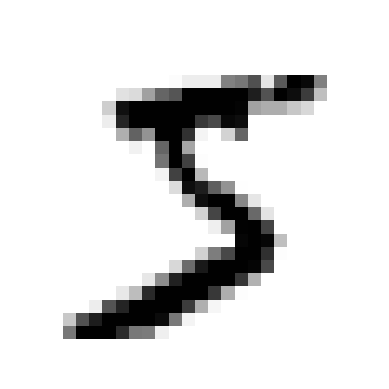

In [8]:
# Eksploracja danych

plt.imshow(x_train[0], cmap="gray_r")
plt.axis("off")

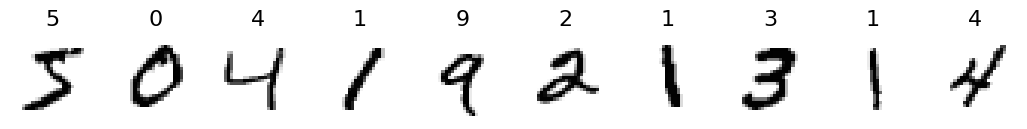

In [9]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis("off")
  plt.imshow(x_train[i-1], cmap="gray_r")
  plt.title(y_train[i-1], color="black", fontsize=16)
plt.show()

In [10]:
from keras.layers.attention.multi_head_attention import activation
from keras.api._v2.keras import layers
model = Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation="softmax"))

In [11]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(x_train, y_train, batch_size=5)

12000/12000 [==============================] - 62s 5ms/step - loss: 0.2401 - accuracy: 0.9291


In [13]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [14]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.1041 - accuracy: 0.9676 - 689ms/epoch - 2ms/step


[0.10409760475158691, 0.9675999879837036]

In [15]:
metrics = pd.DataFrame(history.history)
metrics


,loss,accuracy
0,0.240101,0.92915


In [16]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

In [17]:
model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[0.000000584098, 0.000001966415, 0.000120131306, ..., 0.9996099     , 0.000007521637, 0.00009987808 ],
       [0.000000645858, 0.00016221902 , 0.9997685     , ..., 0.000000005981, 0.000001235262, 0.000000000052],
       [0.000000295763, 0.9994847     , 0.000047020534, ..., 0.00015158698 , 0.00008154382 , 0.000004297662],
       ...,
       [0.000000000908, 0.000000045721, 0.000000000135, ..., 0.000024439156, 0.000013825069, 0.0003891931  ],
       [0.000008101362, 0.000000559278, 0.000000019912, ..., 0.000003947675, 0.00101758    , 0.000000230515],
       [0.000000054787, 0.000000000133, 0.000006306687, ..., 0.000000000139, 0.000000022439, 0.000000006972]],
      dtype=float32)

In [18]:
y_pred= model.predict(x_test)
pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [19]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(pred_classes, columns=['y_pred'])], axis=1)
pred.head(10)


,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [21]:
missclassified = pred[pred['y_test'] != pred['y_pred']]
missclassified.index[:10]

Int64Index([38, 151, 247, 259, 321, 336, 340, 359, 381, 444], dtype='int64')

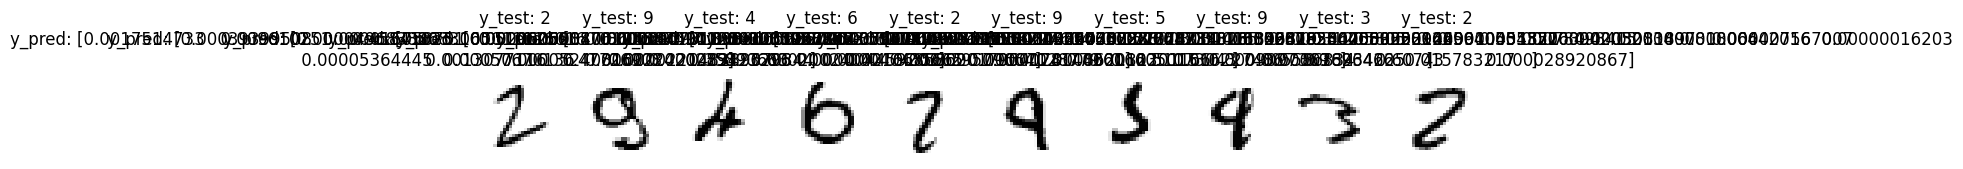

In [23]:
plt.figure(figsize=(13,13))
for i, j in zip(range(1,11), missclassified.index[:10]):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(x_test[j], cmap='gray_r')
  plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()